In [54]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv("df_cleaned.csv")


y = df["BRCAstatesNew"]
X = df.drop(["BRCAstatesNew"], axis =1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
mlpc_tuned =  MLPClassifier(solver = "adam", activation= "logistic", alpha=0.001, hidden_layer_sizes=(100,100,100)).fit(X_train_scaled, y_train)

In [4]:
from catboost import CatBoostClassifier
catb_tuned = CatBoostClassifier(iterations = 100, learning_rate = 0.1, depth= 8).fit(X_train, y_train)

0:	learn: 1.4341892	total: 201ms	remaining: 19.9s
1:	learn: 1.1731409	total: 243ms	remaining: 11.9s
2:	learn: 0.9957901	total: 279ms	remaining: 9.02s
3:	learn: 0.8520169	total: 315ms	remaining: 7.55s
4:	learn: 0.7460226	total: 351ms	remaining: 6.67s
5:	learn: 0.6527086	total: 387ms	remaining: 6.06s
6:	learn: 0.5771133	total: 423ms	remaining: 5.62s
7:	learn: 0.5093634	total: 461ms	remaining: 5.3s
8:	learn: 0.4554925	total: 494ms	remaining: 5s
9:	learn: 0.4070857	total: 527ms	remaining: 4.74s
10:	learn: 0.3638837	total: 560ms	remaining: 4.53s
11:	learn: 0.3249048	total: 571ms	remaining: 4.19s
12:	learn: 0.2920385	total: 605ms	remaining: 4.05s
13:	learn: 0.2630651	total: 639ms	remaining: 3.92s
14:	learn: 0.2372707	total: 672ms	remaining: 3.81s
15:	learn: 0.2146019	total: 707ms	remaining: 3.71s
16:	learn: 0.1958251	total: 741ms	remaining: 3.62s
17:	learn: 0.1777140	total: 773ms	remaining: 3.52s
18:	learn: 0.1612204	total: 806ms	remaining: 3.44s
19:	learn: 0.1461168	total: 818ms	remaining: 

In [5]:
cart_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=3).fit(X_train, y_train)

In [6]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1, n_estimators= 100, max_depth=3 ).fit(X_train, y_train)

In [7]:
knn_tuned = KNeighborsClassifier(n_neighbors= 1).fit(X_train_scaled, y_train)

In [8]:
from lightgbm import LGBMClassifier
lgbm_tuned = LGBMClassifier(learning_rate= 0.1, max_depth= 2, n_estimators= 200).fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 2325, number of used features: 102
[LightGBM] [Info] Start training from score -0.186200
[LightGBM] [Info] Start training from score -2.682571
[LightGBM] [Info] Start training from score -2.947454
[LightGBM] [Info] Start training from score -7.751475
[LightGBM] [Info] Start training from score -3.097515
[LightGBM] [Info] Start training from score -6.142037
[LightGBM] [Info] Start training from score -6.652863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [9]:
loj_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000).fit(X_train_scaled,y_train)


In [12]:
rf_tuned = RandomForestClassifier(max_features=48, min_samples_split=2,n_estimators=100).fit(X_train, y_train)

In [13]:
svm_tuned = SVC(kernel="linear", C = 1).fit(X_train_scaled,  y_train)

In [14]:
from xgboost import XGBClassifier
xgb_tuned = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators= 100, subsample= 0.6).fit(X_train, y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       828
           1       0.90      0.63      0.74        68
           2       1.00      0.83      0.91        52
           3       0.00      0.00      0.00         1
           4       0.97      0.87      0.92        45
           5       0.00      0.00      0.00         2
           6       0.50      1.00      0.67         1

    accuracy                           0.95       997
   macro avg       0.62      0.62      0.60       997
weighted avg       0.95      0.95      0.95       997



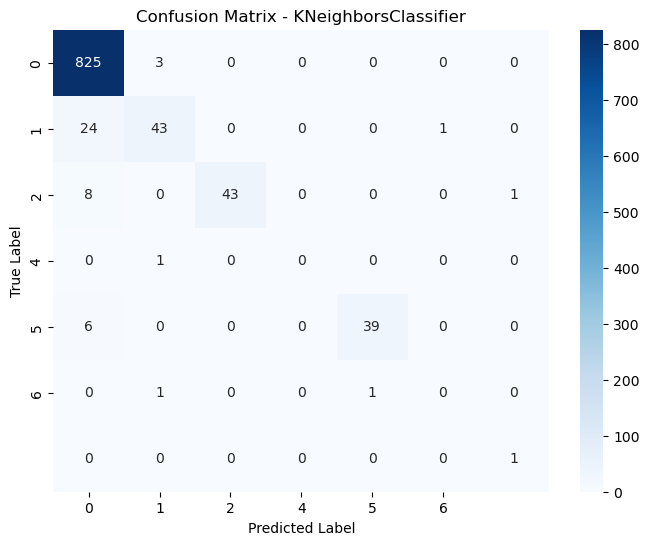

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       0.99      1.00      0.99        68
           2       1.00      1.00      1.00        52
           3       0.00      0.00      0.00         1
           4       0.98      1.00      0.99        45
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1

    accuracy                           1.00       997
   macro avg       0.85      0.79      0.81       997
weighted avg       1.00      1.00      1.00       997



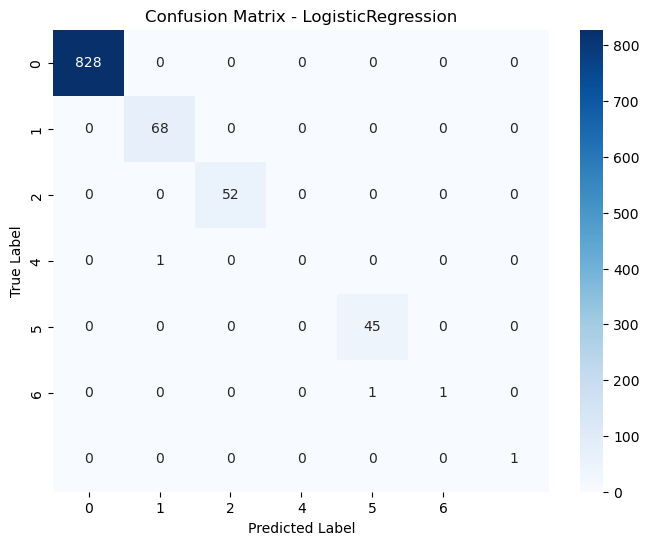

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       1.00      1.00      1.00        68
           2       0.98      1.00      0.99        52
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        45
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1

    accuracy                           1.00       997
   macro avg       0.85      0.86      0.86       997
weighted avg       1.00      1.00      1.00       997



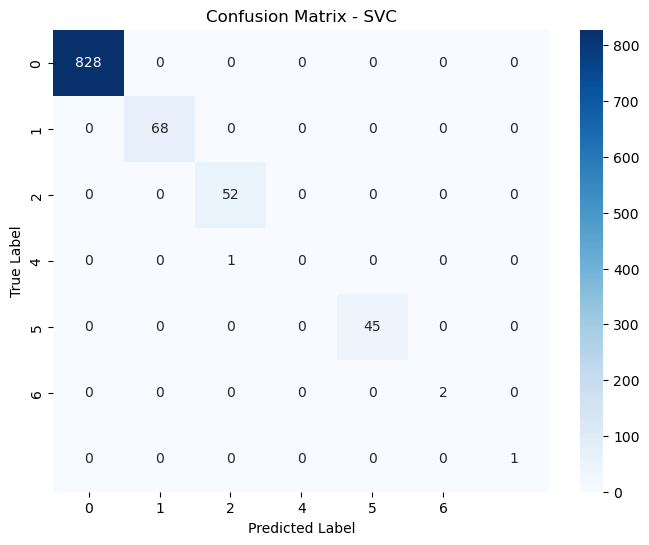

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       1.00      1.00      1.00        68
           2       0.95      1.00      0.97        52
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        45
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         1

    accuracy                           1.00       997
   macro avg       0.71      0.64      0.66       997
weighted avg       1.00      1.00      1.00       997



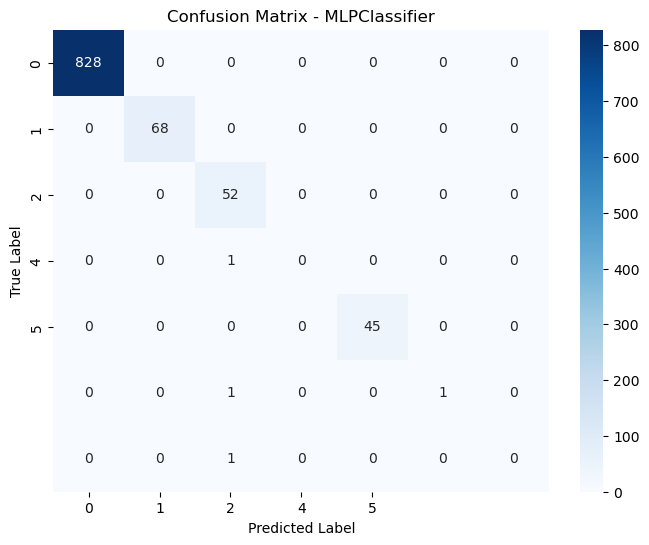

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        45
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1

    accuracy                           1.00       997
   macro avg       1.00      1.00      1.00       997
weighted avg       1.00      1.00      1.00       997



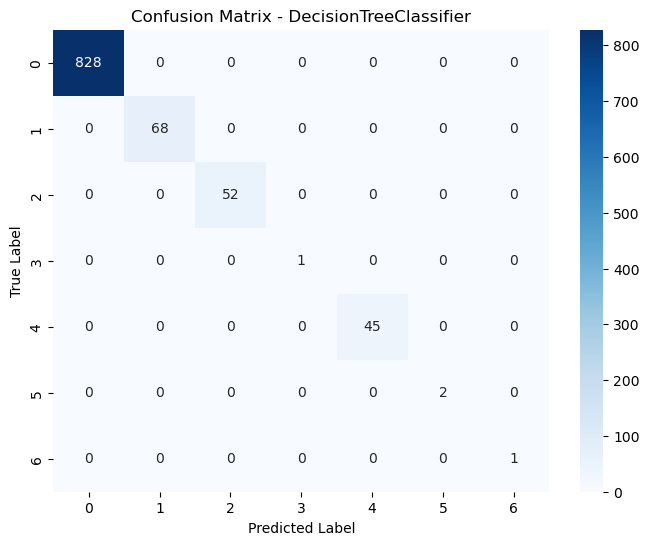

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       0.99      1.00      0.99        68
           2       1.00      1.00      1.00        52
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        45
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1

    accuracy                           1.00       997
   macro avg       0.86      0.86      0.86       997
weighted avg       1.00      1.00      1.00       997



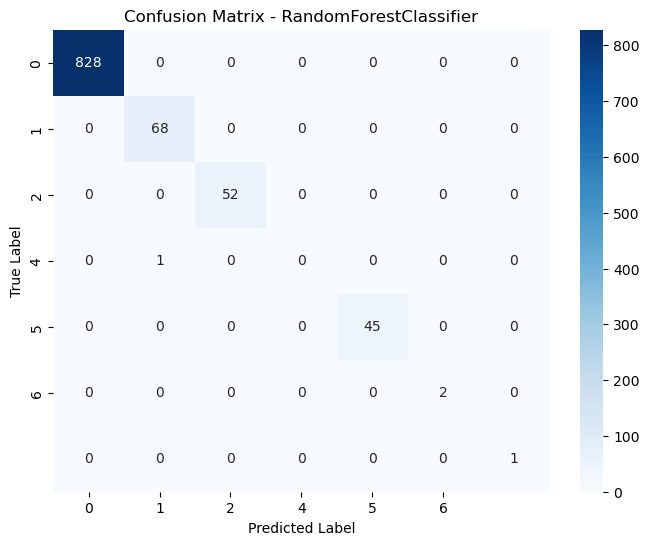

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       1.00      1.00      1.00        68
           2       0.00      0.00      0.00        52
           3       0.02      1.00      0.04         1
           4       1.00      1.00      1.00        45
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.94       997
   macro avg       0.43      0.57      0.43       997
weighted avg       0.94      0.94      0.94       997



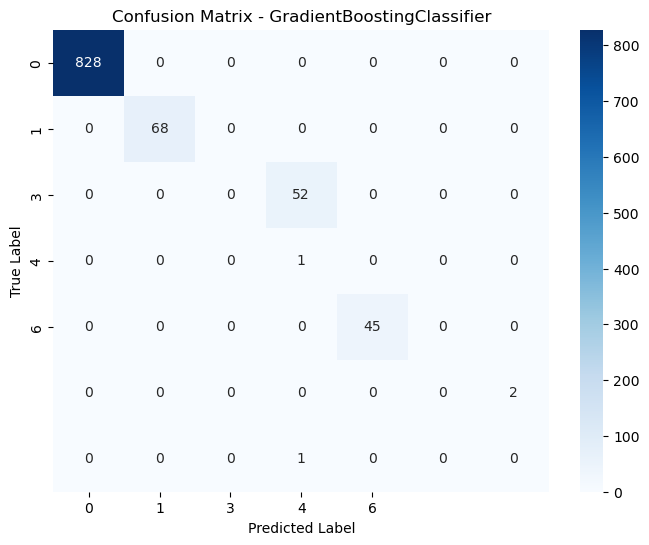

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       1.00      1.00      1.00        68
           2       0.98      1.00      0.99        52
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        45
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1

    accuracy                           1.00       997
   macro avg       0.85      0.86      0.86       997
weighted avg       1.00      1.00      1.00       997



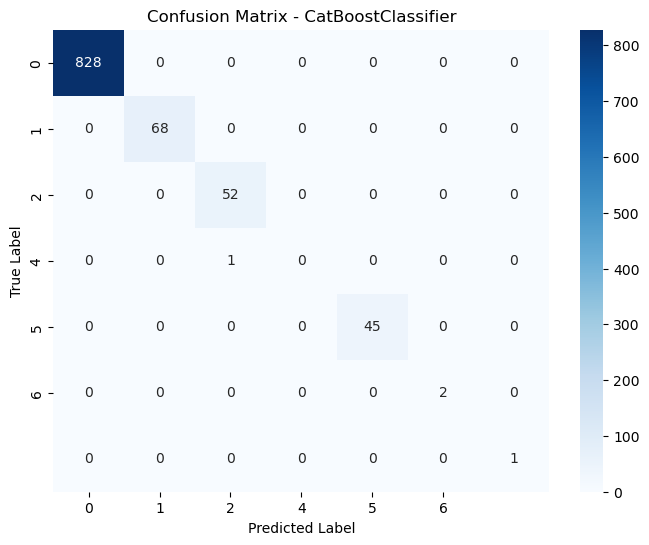

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       1.00      1.00      1.00        68
           2       0.98      1.00      0.99        52
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        45
           5       0.00      0.00      0.00         2
           6       0.33      1.00      0.50         1

    accuracy                           1.00       997
   macro avg       0.62      0.71      0.64       997
weighted avg       1.00      1.00      1.00       997



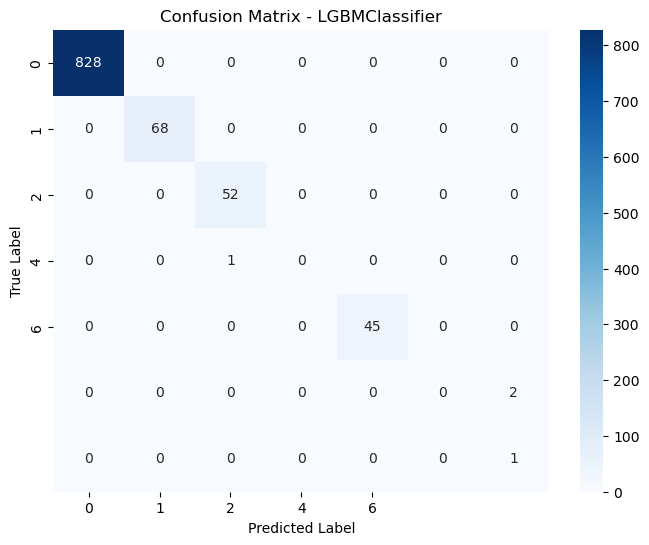

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       0.97      1.00      0.99        68
           2       0.96      1.00      0.98        52
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        45
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           1.00       997
   macro avg       0.56      0.57      0.57       997
weighted avg       0.99      1.00      0.99       997



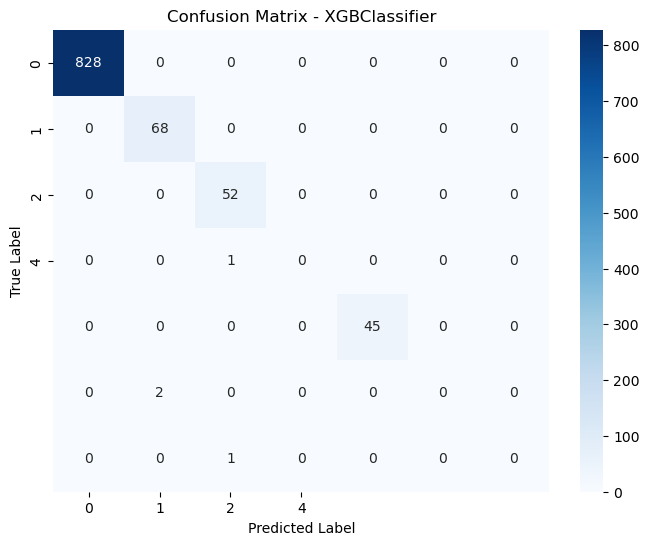

In [80]:
models = [knn_tuned,
         loj_model,
         svm_tuned,
         mlpc_tuned,
         cart_tuned,
         rf_tuned,
         gbm_tuned,
         catb_tuned,
         lgbm_tuned,
         xgb_tuned]
result = []
results = pd.DataFrame(columns = ["Models", "Train Accuracy", "Test Accuracy", "F1-score" ])

if 'X_test_scaled' in globals():
    X_test_used = X_test_scaled
else:
    X_test_used = X_test

if 'X_train_scaled' in globals():
    X_train_used = X_train_scaled
else:
    X_train_used = X_train
              
for model in models:
    names = model.__class__.__name__
    y_train_pred = model.predict(X_train_used)
    y_test_pred = model.predict(X_test_used)
    train_acc = accuracy_score(y_train, y_train_pred) * 100
    test_acc = accuracy_score(y_test, y_test_pred) * 100
    f1 = f1_score(y_test, y_test_pred, average='weighted') * 100
    result = pd.DataFrame([[names, train_acc, test_acc, f1 ]], columns = ["Models", "Train Accuracy", "Test Accuracy", "F1-score" ])
    results = pd.concat([results, result], ignore_index=True)

    cm = confusion_matrix(y_test, y_test_pred)

    print(classification_report(y_test, y_test_pred))

    labels = sorted(np.unique(y_test_pred)) 
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix - {names}")
    plt.show()

In [82]:
results

,Models,Train Accuracy,Test Accuracy,F1-score
0,KNeighborsClassifier,100.000000,95.386158,95.022324
1,LogisticRegression,100.000000,99.799398,99.733448
2,SVC,100.000000,99.899699,99.850026
3,MLPClassifier,99.827957,99.699097,99.586298
4,DecisionTreeClassifier,100.000000,100.000000,100.000000
5,RandomForestClassifier,99.956989,99.899699,99.849915
6,GradientBoostingClassifier,94.408602,94.483450,94.386797
7,CatBoostClassifier,99.956989,99.899699,99.850026
8,LGBMClassifier,99.870968,99.699097,99.599274
9,XGBClassifier,99.698925,99.598796,99.401541
